<a href="https://colab.research.google.com/github/Ashi743/ML-practices/blob/main/adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
df= pd.DataFrame()

In [49]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]
df
# BINARY

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but AdaBoostRegressor was fitted with feature names



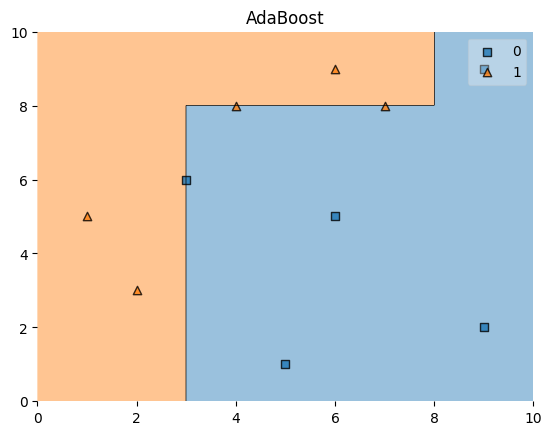

In [73]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
ada = AdaBoostRegressor(n_estimators=3)
ada.fit(df[['X1','X2']],df['label'])
plot_decision_regions(df[['X1','X2']].values,df['label'].values,clf=ada)
plt.title("AdaBoost")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but AdaBoostRegressor was fitted with feature names



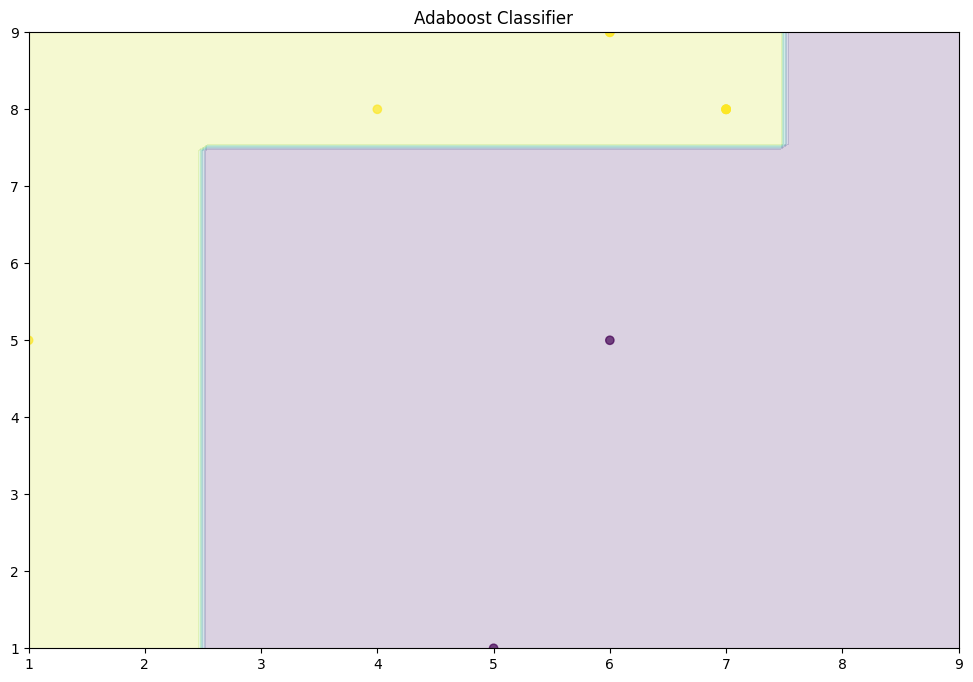

In [75]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12, 8))
    x_range = np.linspace(x.min(), x.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(x[:,0], x[:,1], c=y, alpha=.7)
    plt.title("Adaboost Classifier")
    plt.show()

plot_decision_boundary(ada)

In [6]:
import plotly.express as px
import numpy as np
import pandas as pd

# Sample data
x = np.random.rand(10)
y = np.random.rand(10)
labels = [f'Point {i}' for i in range(len(x))]

# Create a DataFrame
df = pd.DataFrame({'x': x, 'y': y, 'label': labels})

# Create interactive scatter plot
fig = px.scatter(df, x='x', y='y', hover_name='label', title="Interactive Scatter Plot with Hover Tooltips")

# Show plot
fig.show()


In [50]:
#weight1
df.head()

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0


In [51]:
df["w1"]= 1/df.shape[0]


DecisionTreeClassifier(max_depth=1)
[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'), Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'), Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]


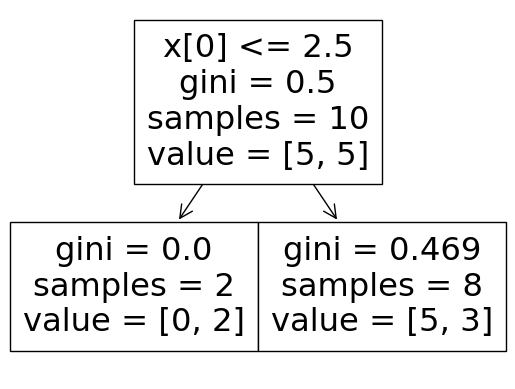

In [52]:
from sklearn.tree import DecisionTreeClassifier
x= df[["X1","X2"]].values
y= df["label"].values
dt1 = DecisionTreeClassifier(max_depth=1)
print(dt1.fit(x,y))

from sklearn.tree import plot_tree
print(plot_tree(dt1))

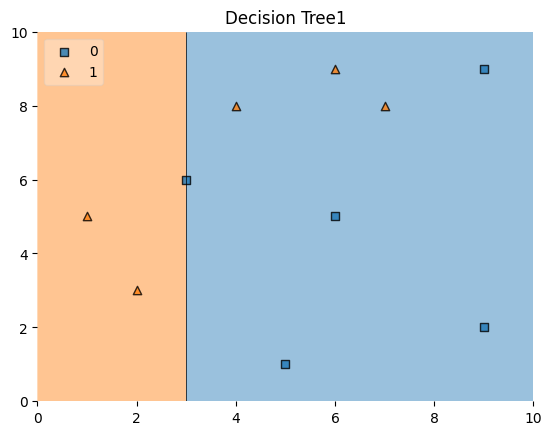

In [53]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y,clf= dt1, legend= 2)
plt.title("Decision Tree1")
plt.show()

In [54]:
df['y_pred1']= dt1.predict(x)
df

,X1,X2,label,w1,y_pred1
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [55]:
#error
erroroneus1= df[df["label"]!= df["y_pred1"]].shape[0]
erroroneus1

3

In [56]:
error1= erroroneus1/df.shape[0]
error1

0.3

In [57]:
def calculate_alpha(error):
  return 0.5*(np.log((1-error)/error))

In [58]:
alpha1= calculate_alpha(error1)
alpha1

0.42364893019360184

In [59]:
def update_wt(row,alpha=alpha1):
  if row["label"]== row["y_pred1"]:
    return row["w1"]*np.exp(-alpha)
  else:
    return row["w1"]*np.exp(+alpha)

In [60]:
df['updated_weights'] = df.apply(update_wt,axis=1)
df

,X1,X2,label,w1,y_pred1,updated_weights
0,1,5,1,0.1,1,0.065465
1,2,3,1,0.1,1,0.065465
2,3,6,0,0.1,0,0.065465
3,4,8,1,0.1,0,0.152753
4,5,1,0,0.1,0,0.065465
5,6,9,1,0.1,0,0.152753
6,6,5,0,0.1,0,0.065465
7,7,8,1,0.1,0,0.152753
8,9,9,0,0.1,0,0.065465
9,9,2,0,0.1,0,0.065465


In [61]:
df["normalized_w2"]= df["updated_weights"]/df["updated_weights"].sum()
df

,X1,X2,label,w1,y_pred1,updated_weights,normalized_w2
0,1,5,1,0.1,1,0.065465,0.071429
1,2,3,1,0.1,1,0.065465,0.071429
2,3,6,0,0.1,0,0.065465,0.071429
3,4,8,1,0.1,0,0.152753,0.166667
4,5,1,0,0.1,0,0.065465,0.071429
5,6,9,1,0.1,0,0.152753,0.166667
6,6,5,0,0.1,0,0.065465,0.071429
7,7,8,1,0.1,0,0.152753,0.166667
8,9,9,0,0.1,0,0.065465,0.071429
9,9,2,0,0.1,0,0.065465,0.071429


In [62]:
df["upper_bound"]= np.cumsum(df["normalized_w2"])
df["lower_bound"]= df["upper_bound"]- df["normalized_w2"]
df.columns
df[['X1', 'X2', 'label', 'w1', 'y_pred1', 'updated_weights',
       'normalized_w2','lower_bound',  'upper_bound' ]]


,X1,X2,label,w1,y_pred1,updated_weights,normalized_w2,lower_bound,upper_bound
0,1,5,1,0.1,1,0.065465,0.071429,0.000000,0.071429
1,2,3,1,0.1,1,0.065465,0.071429,0.071429,0.142857
2,3,6,0,0.1,0,0.065465,0.071429,0.142857,0.214286
3,4,8,1,0.1,0,0.152753,0.166667,0.214286,0.380952
4,5,1,0,0.1,0,0.065465,0.071429,0.380952,0.452381
5,6,9,1,0.1,0,0.152753,0.166667,0.452381,0.619048
6,6,5,0,0.1,0,0.065465,0.071429,0.619048,0.690476
7,7,8,1,0.1,0,0.152753,0.166667,0.690476,0.857143
8,9,9,0,0.1,0,0.065465,0.071429,0.857143,0.928571
9,9,2,0,0.1,0,0.065465,0.071429,0.928571,1.000000


In [63]:
def new_dataset(df):
  indices=[]
  for i in range(df.shape[0]):
    r= np.random.uniform()
    for i,row in df.iterrows():
      if row["lower_bound"]< r <= row["upper_bound"]:
        indices.append(i)


  return indices


In [64]:
index_values= new_dataset(df)
index_values

[4, 7, 5, 5, 6, 3, 0, 7, 7, 7]

In [65]:
second_df = df.iloc[index_values,[0,1,2,3]]
second_df

,X1,X2,label,w1
4,5,1,0,0.1
7,7,8,1,0.1
5,6,9,1,0.1
5,6,9,1,0.1
6,6,5,0,0.1
3,4,8,1,0.1
0,1,5,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1


DecisionTreeClassifier(max_depth=1)
[Text(0.5, 0.75, 'x[1] <= 6.5\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'), Text(0.25, 0.25, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'), Text(0.75, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]')]


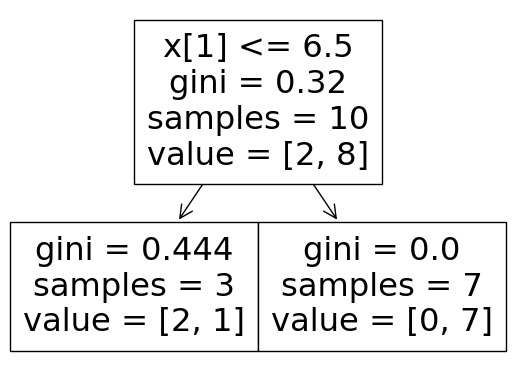

In [66]:
from sklearn.tree import DecisionTreeClassifier
x= second_df[["X1","X2"]].values
y= second_df["label"].values
dt2 = DecisionTreeClassifier(max_depth=1)
print(dt2.fit(x,y))

from sklearn.tree import plot_tree
print(plot_tree(dt2))

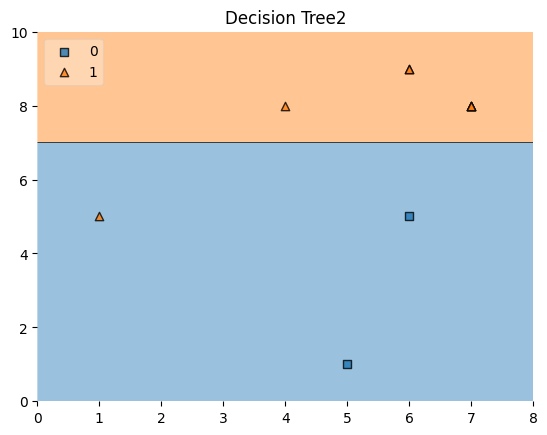

In [67]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y,clf= dt2, legend= 2)
plt.title("Decision Tree2")
plt.show()

In [96]:
second_df['y_pred'] = dt2.predict(x)
erroroneus2 = second_df[second_df["label"] != second_df["y_pred"]].shape[0]
error2 = erroroneus2 / second_df.shape[0]
def calculate_alpha(error):
        return 0.5 * np.log((1 - error) / error)
alpha2 = calculate_alpha(error2)
print(alpha2)
def update_wt(row, alpha=alpha2):
       if row["label"] == row["y_pred"]:
           return row["w1"] * np.exp(-alpha)
       else:
           return row["w1"] * np.exp(alpha)

second_df['updated_weights'] = second_df.apply(update_wt, axis=1)
# Normalize weights
second_df["normalized_w2"] = second_df["updated_weights"] / second_df["updated_weights"].sum()
   # Calculate cumulative bounds
second_df["upper_bound"] = np.cumsum(second_df["normalized_w2"])
second_df["lower_bound"] = second_df["upper_bound"] - second_df["normalized_w2"]

print(second_df[['X1', 'X2', 'label', 'w1', 'y_pred', 'updated_weights',
             'normalized_w2', 'lower_bound', 'upper_bound']])

def new_dataset(df):
    indices = []
    for _ in range(df.shape[0]):
        r = np.random.uniform()
        for i, row in df.iterrows():
            if row["lower_bound"] < r <= row["upper_bound"]:
                indices.append(i)
                break
    return indices

index_values = new_dataset(second_df)
third_df = second_df.iloc[index_values, [0, 1, 2, 3]]

print(third_df)

1.0986122886681098
   X1  X2  label   w1  y_pred  updated_weights  normalized_w2  lower_bound  \
4   5   1      0  0.1       0         0.033333       0.055556     0.000000   
7   7   8      1  0.1       1         0.033333       0.055556     0.055556   
5   6   9      1  0.1       1         0.033333       0.055556     0.111111   
5   6   9      1  0.1       1         0.033333       0.055556     0.166667   
6   6   5      0  0.1       0         0.033333       0.055556     0.222222   
3   4   8      1  0.1       1         0.033333       0.055556     0.277778   
0   1   5      1  0.1       0         0.300000       0.500000     0.333333   
7   7   8      1  0.1       1         0.033333       0.055556     0.833333   
7   7   8      1  0.1       1         0.033333       0.055556     0.888889   
7   7   8      1  0.1       1         0.033333       0.055556     0.944444   

   upper_bound  
4     0.055556  
7     0.111111  
5     0.166667  
5     0.222222  
6     0.277778  
3     0.333333  
0  

DecisionTreeClassifier(max_depth=1)
[Text(0.5, 0.75, 'x[1] <= 3.0\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'), Text(0.25, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'), Text(0.75, 0.25, 'gini = 0.278\nsamples = 6\nvalue = [1, 5]')]


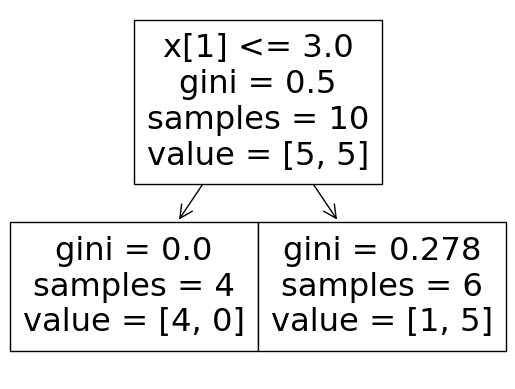

In [97]:
from sklearn.tree import DecisionTreeClassifier
x= third_df[["X1","X2"]].values
y= third_df["label"].values
dt3 = DecisionTreeClassifier(max_depth=1)
print(dt3.fit(x,y))

from sklearn.tree import plot_tree
print(plot_tree(dt3))

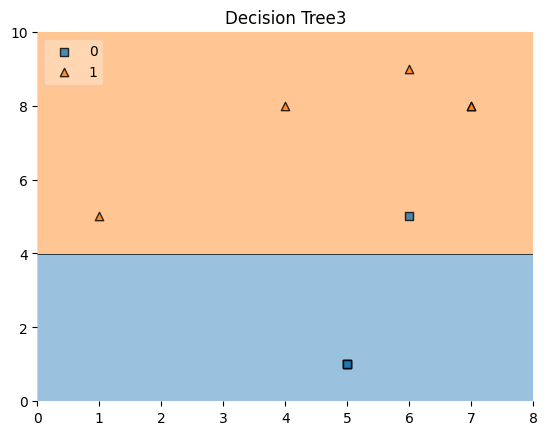

In [98]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y,clf= dt3, legend= 2)
plt.title("Decision Tree3")
plt.show()

In [100]:
third_df['y_pred'] = dt3.predict(x)
erroroneus3 = third_df[third_df["label"] != third_df["y_pred"]].shape[0]
error3 = erroroneus2 / third_df.shape[0]
def calculate_alpha(error):
        return 0.5 * np.log((1 - error) / error)
alpha3 = calculate_alpha(error3)
print(alpha3)
def update_wt(row, alpha=alpha3):
       if row["label"] == row["y_pred"]:
           return row["w1"] * np.exp(-alpha)
       else:
           return row["w1"] * np.exp(alpha)

third_df['updated_weights'] = third_df.apply(update_wt, axis=1)
# Normalize weights
third_df["normalized_w2"] = third_df["updated_weights"] / third_df["updated_weights"].sum()
   # Calculate cumulative bounds
third_df["upper_bound"] = np.cumsum(third_df["normalized_w2"])
third_df["lower_bound"] = third_df["upper_bound"] - third_df["normalized_w2"]

print(third_df[['X1', 'X2', 'label', 'w1', 'y_pred', 'updated_weights',
             'normalized_w2', 'lower_bound', 'upper_bound']])

def new_dataset(df):
    indices = []
    for _ in range(df.shape[0]):
        r = np.random.uniform()
        for i, row in df.iterrows():
            if row["lower_bound"] < r <= row["upper_bound"]:
                indices.append(i)
                break
    return indices

index_values = new_dataset(third_df)
fouth_df = third_df.iloc[index_values, [0, 1, 2, 3]]

print(fouth_df)

1.0986122886681098
   X1  X2  label   w1  y_pred  updated_weights  normalized_w2  lower_bound  \
7   7   8      1  0.1       1         0.033333       0.055556     0.000000   
0   1   5      1  0.1       1         0.033333       0.055556     0.055556   
7   7   8      1  0.1       1         0.033333       0.055556     0.111111   
3   4   8      1  0.1       1         0.033333       0.055556     0.166667   
4   5   1      0  0.1       0         0.033333       0.055556     0.222222   
4   5   1      0  0.1       0         0.033333       0.055556     0.277778   
4   5   1      0  0.1       0         0.033333       0.055556     0.333333   
4   5   1      0  0.1       0         0.033333       0.055556     0.388889   
6   6   5      0  0.1       1         0.300000       0.500000     0.444444   
5   6   9      1  0.1       1         0.033333       0.055556     0.944444   

   upper_bound  
7     0.055556  
0     0.111111  
7     0.166667  
3     0.222222  
4     0.277778  
4     0.333333  
4  

DecisionTreeClassifier(max_depth=1)
[Text(0.5, 0.75, 'x[1] <= 4.5\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'), Text(0.25, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'), Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]


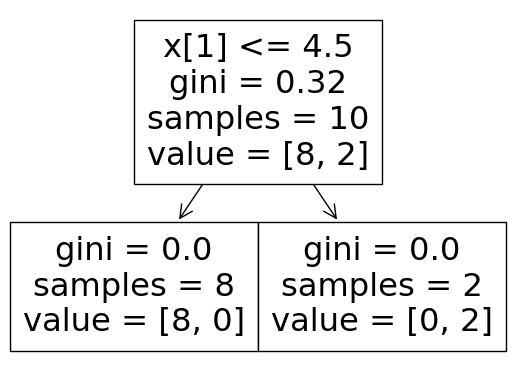

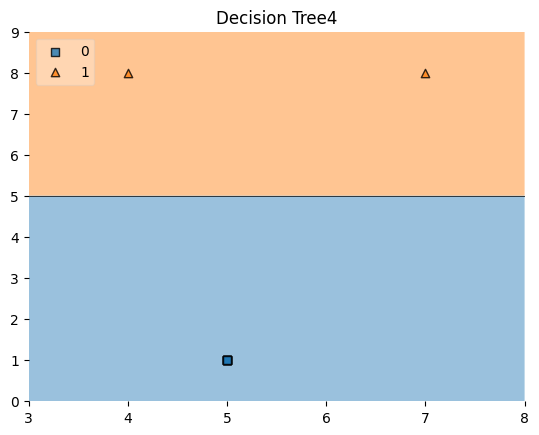

In [107]:
from sklearn.tree import DecisionTreeClassifier
x= fouth_df[["X1","X2"]].values
y= fouth_df["label"].values
dt4 = DecisionTreeClassifier(max_depth=1)
print(dt4.fit(x,y))


from sklearn.tree import plot_tree
print(plot_tree(dt4))
plt.show()

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y,clf= dt4, legend= 2)
plt.title("Decision Tree4")
plt.show()


In [110]:
fouth_df['y_pred'] = dt4.predict(x)
erroroneus4 = fouth_df[fouth_df["label"] != fouth_df["y_pred"]].shape[0]
error4 = erroroneus3 / fouth_df.shape[0]
def calculate_alpha(error):
        return 0.5 * np.log((1 - error) / error)
alpha4 = calculate_alpha(error4)
print(alpha4)
def update_wt(row, alpha=alpha4):
       if row["label"] == row["y_pred"]:
           return row["w1"] * np.exp(-alpha)
       else:
           return row["w1"] * np.exp(alpha)

fouth_df['updated_weights'] = fouth_df.apply(update_wt, axis=1)
# Normalize weights
fouth_df["normalized_w2"] = fouth_df["updated_weights"] / fouth_df["updated_weights"].sum()
   # Calculate cumulative bounds
fouth_df["upper_bound"] = np.cumsum(fouth_df["normalized_w2"])
fouth_df["lower_bound"] = fouth_df["upper_bound"] - fouth_df["normalized_w2"]

print(fouth_df[['X1', 'X2', 'label', 'w1', 'y_pred', 'updated_weights',
             'normalized_w2', 'lower_bound', 'upper_bound']])

def new_dataset(df):
    indices = []
    for _ in range(df.shape[0]):
        r = np.random.uniform()
        for i, row in df.iterrows():
            if row["lower_bound"] < r <= row["upper_bound"]:
                indices.append(i)
                break
    return indices

index_values = new_dataset(fouth_df)
fifth_df = fouth_df.iloc[index_values, [0, 1, 2, 3]]
fifth_df


1.0986122886681098
   X1  X2  label   w1  y_pred  updated_weights  normalized_w2  lower_bound  \
4   5   1      0  0.1       0         0.033333            0.1          0.0   
4   5   1      0  0.1       0         0.033333            0.1          0.1   
7   7   8      1  0.1       1         0.033333            0.1          0.2   
4   5   1      0  0.1       0         0.033333            0.1          0.3   
4   5   1      0  0.1       0         0.033333            0.1          0.4   
4   5   1      0  0.1       0         0.033333            0.1          0.5   
4   5   1      0  0.1       0         0.033333            0.1          0.6   
3   4   8      1  0.1       1         0.033333            0.1          0.7   
4   5   1      0  0.1       0         0.033333            0.1          0.8   
4   5   1      0  0.1       0         0.033333            0.1          0.9   

   upper_bound  
4          0.1  
4          0.2  
7          0.3  
4          0.4  
4          0.5  
4          0.6  
4  

,X1,X2,label,w1
4,5,1,0,0.1
4,5,1,0,0.1
4,5,1,0,0.1
4,5,1,0,0.1
4,5,1,0,0.1
4,5,1,0,0.1
4,5,1,0,0.1
4,5,1,0,0.1
4,5,1,0,0.1
4,5,1,0,0.1


In [111]:
print(alpha1, alpha2, alpha3)

0.42364893019360184 1.0986122886681098 1.0986122886681098


In [113]:
query = np.array([1,5])
print(dt1.predict(query.reshape(1, 2)))
print(dt2.predict(query.reshape(1, 2)))
print(dt3.predict(query.reshape(1, 2)))
print(dt4.predict(query.reshape(1, 2)))

[1]
[0]
[1]
[1]


In [114]:
1*alpha1+0*alpha2+1*alpha3

1.5222612188617117

In [115]:
np.sign(1*alpha1+0*alpha2+1*alpha3)   # -1 if x < 0, 0 if x==0, 1 if x > 0 .

1.0

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [77]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

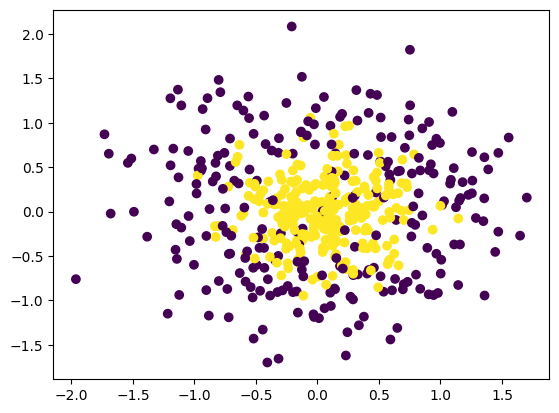

In [78]:
plt.scatter(X[:,0],X[:,1],c=y)

In [79]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

abc = AdaBoostClassifier()
abc.fit(X,y)

np.mean(cross_val_score(abc,X,y,scoring='accuracy',cv=10))

0.786

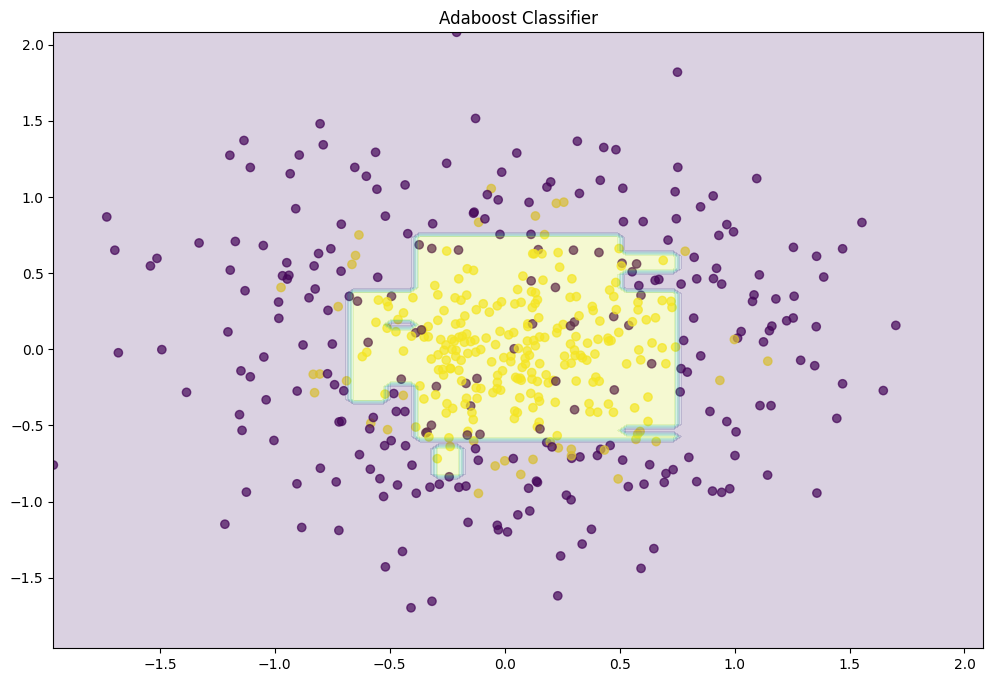

In [81]:

def plot_decision_boundary(clf):
    plt.figure(figsize=(12, 8))
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)

    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)

    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)

    plt.title("Adaboost Classifier")
    plt.show()

plot_decision_boundary(abc)

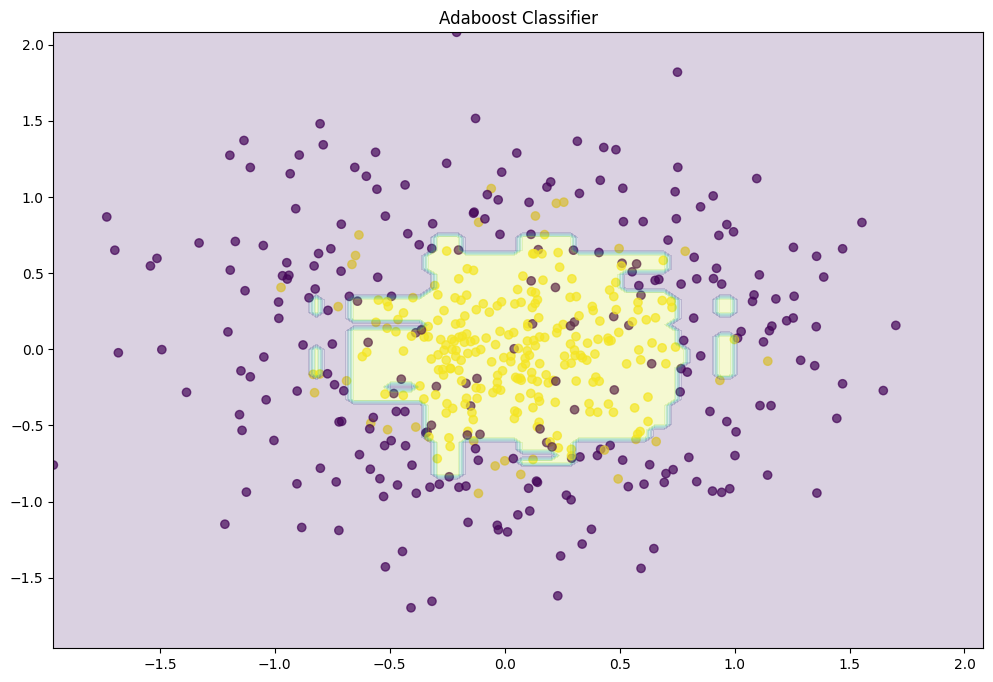

In [82]:
abc = AdaBoostClassifier(n_estimators=1500,learning_rate=0.1)
abc.fit(X,y)
plot_decision_boundary(abc)

In [84]:
from sklearn.model_selection import GridSearchCV

grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [ 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']


grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.832000 using {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 500}


all codes in one


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

def evaluate(df):
    df["w1"] = 1 / df.shape[0]
    x = df[["X1", "X2"]].values
    y = df["label"].values
    dt1 = DecisionTreeClassifier(max_depth=1)
    dt1.fit(x, y)

    # Plot the decision tree
    plt.figure(figsize=(10, 6))
    plot_tree(dt1, feature_names=["X1", "X2"], class_names=["0", "1"], filled=True)
    plt.title("Decision Tree 1")
    plt.show()

    # Plot decision regions
    plot_decision_regions(x, y, clf=dt1, legend=2)
    plt.title("Decision Tree Decision Regions")
    plt.show()

    return dt1

def new_dat(df):
    dt1 = evaluate(df)
    df['y_pred1'] = dt1.predict(df[["X1", "X2"]].values)

    # Calculate error
    erroroneus1 = df[df["label"] != df["y_pred1"]].shape[0]
    error1 = erroroneus1 / df.shape[0]
    print(f"Error count: {erroroneus1}, Error rate: {error1}")

    # Calculate alpha
    def calculate_alpha(error):
        return 0.5 * np.log((1 - error) / error)

    alpha1 = calculate_alpha(error1)
    print(f"Alpha: {alpha1}")

    def update_wt(row, alpha=alpha1):
        if row["label"] == row["y_pred1"]:
            return row["w1"] * np.exp(-alpha)
        else:
            return row["w1"] * np.exp(alpha)

    df['updated_weights'] = df.apply(update_wt, axis=1)

    # Normalize weights
    df["normalized_w2"] = df["updated_weights"] / df["updated_weights"].sum()

    # Calculate cumulative bounds
    df["upper_bound"] = np.cumsum(df["normalized_w2"])
    df["lower_bound"] = df["upper_bound"] - df["normalized_w2"]

    print(df[['X1', 'X2', 'label', 'w1', 'y_pred1', 'updated_weights',
              'normalized_w2', 'lower_bound', 'upper_bound']])

    return df

def new_dataset(df):
    indices = []
    for _ in range(df.shape[0]):
        r = np.random.uniform()
        for i, row in df.iterrows():
            if row["lower_bound"] < r <= row["upper_bound"]:
                indices.append(i)
                break
    return indices


In [ ]:
# Perform evaluation and update weights
df = new_dat(df)

# Create a new dataset based on updated weights
index_values = new_dataset(df)
second_df = df.iloc[index_values, [0, 1, 2, 3]]

print(second_df)